In [ ]:
//@version=5
indicator("Previous 2 Daily and Weekly Candle Ranges", overlay=true)

// === Function to get OHLC of specified candle ===
get_prev_ohlc(tf, shift) =>
    o = request.security(syminfo.tickerid, tf, open[shift])
    h = request.security(syminfo.tickerid, tf, high[shift])
    l = request.security(syminfo.tickerid, tf, low[shift])
    c = request.security(syminfo.tickerid, tf, close[shift])
    [o, h, l, c]

// === Function to calculate ranges and colors ===
get_data(tf, shift) =>
    [o, h, l, c] = get_prev_ohlc(tf, shift)
    full_range = h - l
    oc_range = math.abs(c - o)
    hl_range = h - l
    is_bull = c > o
    bg_color = is_bull ? color.new(color.green, 80) : color.new(color.red, 80)
    [full_range, oc_range, hl_range, bg_color]

// === Daily Candle Data ===
[d1_fr, d1_oc, d1_hl, d1_bg] = get_data("D", 1)
[d2_fr, d2_oc, d2_hl, d2_bg] = get_data("D", 2)

// === Weekly Candle Data ===
[w0_fr, w0_oc, w0_hl, w0_bg] = get_data("W", 0) // Developing Week
[w1_fr, w1_oc, w1_hl, w1_bg] = get_data("W", 1)
[w2_fr, w2_oc, w2_hl, w2_bg] = get_data("W", 2)


// === Create and update table ===
var table t = table.new(position.top_right, 80, 80, border_width=1)

if bar_index == 1
    table.cell(t, 0, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(t, 1, 0, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))

    table.cell(t, 0, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny, bgcolor=color.rgb(120, 123, 134, 100))
    table.cell(t, 1, 1, "", text_color=color.rgb(255, 255, 255, 100), text_size = size.tiny,bgcolor=color.rgb(120, 123, 134, 100))

// === Daily Rows ===
table.cell(t, 1, 2, "𝑫𝒂𝒕𝒂", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(t, 0, 3, "Date", text_size = size.tiny)
table.cell(t, 1, 3, "A5", text_size = size.tiny)

table.cell(t, 0, 4, "Time", text_size = size.tiny)
table.cell(t, 1, 4, "B2 - Prev 1", text_size = size.tiny)
 
table.cell(t, 0, 5, "Time", text_size = size.tiny)
table.cell(t, 1, 5, "B2 - Prev 1", text_size = size.tiny)

table.cell(t, 0, 6, "Type", text_size = size.tiny)
table.cell(t, 1, 6, "B2 - Prev 1", text_size = size.tiny)

table.cell(t, 1, 7, "𝑯𝒊𝒈𝒉𝒆𝒓 𝑻𝑭", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(t, 0, 8, "6:00\nяαηgє", text_size = size.tiny)
table.cell(t, 1, 8, "HL:\nOC:", text_size = size.tiny)

table.cell(t, 0, 9, "8:00\nяαηgє", text_size = size.tiny)
table.cell(t, 1, 9, "HL:\nOC:", text_size = size.tiny)

table.cell(t, 1, 11, "1D 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(t, 0, 12, "-1D \nяαηgє", text_size = size.tiny)
table.cell(t, 1, 12, "HL | $" + str.tostring(d1_hl, "#") + "\nOC | $" + str.tostring(d1_oc, "#"), text_size = size.tiny, bgcolor=d1_bg)

table.cell(t, 0, 13, "-2D \nяαηgє", text_size = size.tiny)
table.cell(t, 1, 13, "HL | $" + str.tostring(d2_hl, "#") + "\nOC | $" + str.tostring(d2_oc, "#"), text_size = size.tiny, bgcolor=d2_bg)

table.cell(t, 1, 14, "1W 𝑪𝒂𝒏𝒅𝒍𝒆", text_color = color.white, text_size = size.tiny, bgcolor = color.navy)

table.cell(t, 0, 15, "0W \nяαηgє", text_size = size.tiny)
table.cell(t, 1, 15, "HL | $" + str.tostring(w0_hl, "#") + "\nOC | $" + str.tostring(w0_oc, "#"), text_size = size.tiny, bgcolor=w0_bg)

table.cell(t, 0, 16, "-1W \nяαηgє", text_size = size.tiny)
table.cell(t, 1, 16, "HL | $" + str.tostring(w1_hl, "#") + "\nOC | $" + str.tostring(w1_oc, "#"), text_size = size.tiny, bgcolor=w1_bg)

table.cell(t, 0, 17, "-2W \nяαηgє", text_size = size.tiny)
table.cell(t, 1, 17, "HL | $" + str.tostring(w2_hl, "#") + "\nOC | $" + str.tostring(w2_oc, "#"), text_size = size.tiny, bgcolor=w2_bg)



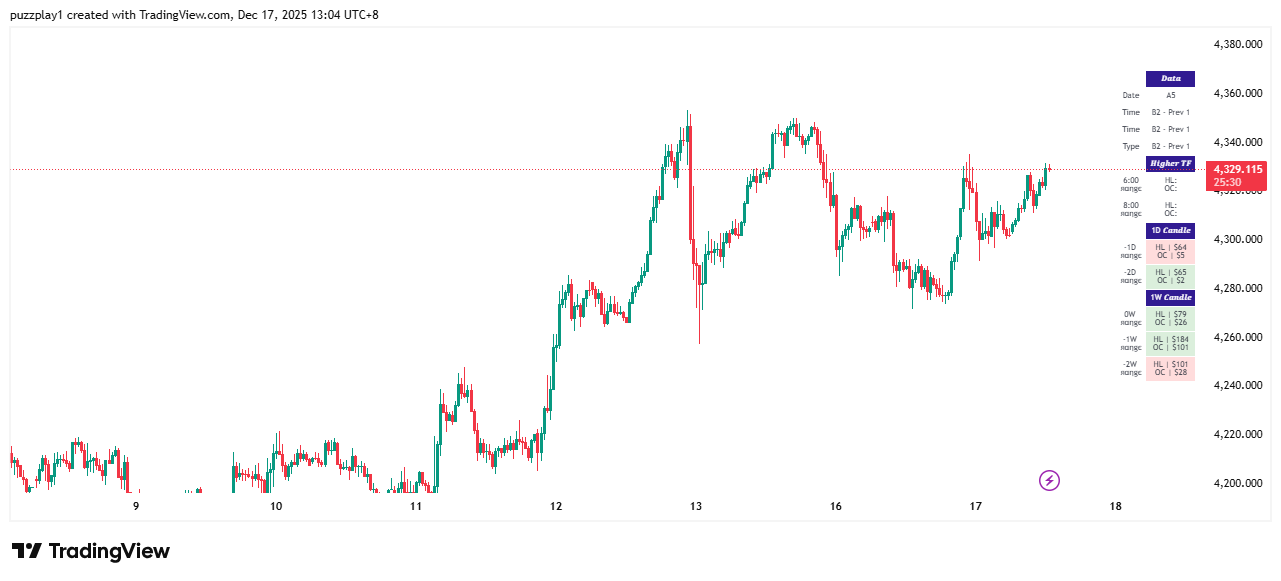